# Simple Tweet Sentiment Analysis 

The aim of this analysis is to look at the polarity of tweets that uses the #boundaries hashtag. Polarity here is the feeling or attitude of the tweet, where it is on a scale going all the way to negative (-1), positive (+1), and neutral (0). For this we will use the 'tweepy' module for Python to get data from the Twitter API, as well as the 'textblob' module, which is a Natural Language Processing (NPL) module which can analyse sentences.

## Connecting With The Twitter API
After creating a new app using my Twitter profile, I get the require tokens to connect with the Twitter API.

In [185]:
import tweepy
import pandas as pd
from textblob import TextBlob
from tweepy import OAuthHandler

#Twitter API credentials
CONSUMER_KEY = "Insert Here
CONSUMER_SECRET = "Insert Here
ACCESS_KEY = "Insert Here
ACCESS_SECRET = "Insert Here

auth = OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_KEY, ACCESS_SECRET)
 
api = tweepy.API(auth)

## Fetching Tweets
We limit the tweets sample size to 500, and fetch only those that uses the hashtag #boundaries. Each collected tweet will be added to a tweets list, then converted into a Python DataFrame for easy analysis going forward.

In [220]:
max_tweets = 500

tweets = []

for tweet in tweepy.Cursor(api.search, q='#boundaries', rpp=100).items(max_tweets):
    tweets.append(tweet)

In [221]:
tweets_df = pd.DataFrame(vars(tweets[i]) for i in range(len(tweets)))

## Tweet Polarity
We select the text from each tweet and analyse the sentiment of the text. The 'sentiment' function for textblob generates two values: i) polarity; ii) subjectivity. But for our purposes, we only use polarity. Depending on the polarity of the text, the tweets will be grouped into Positive, Negative, and Neutral lists and again converted into a Dataframe.

In [223]:
import numpy as np

positive = []

negative = []

neutral = []

for idx, tweet in tweets_df.iterrows():
    blob = TextBlob(tweet["text"])
    if blob.sentiment.polarity < 0:
        negative.append(tweet)
    if blob.sentiment.polarity == 0:
        neutral.append(tweet)
    else:
        positive.append(tweet)
        
col_names = list(tweets_df.columns)

print(len(negative))
print(len(positive))
print(len(neutral))



51
245
255


In [226]:
positive_df = pd.DataFrame(np.array(positive).reshape(245,34), columns = col_names)
negative_df = pd.DataFrame(np.array(negative).reshape(51,34), columns = col_names)
neutral_df = pd.DataFrame(np.array(neutral).reshape(255,34), columns = col_names)

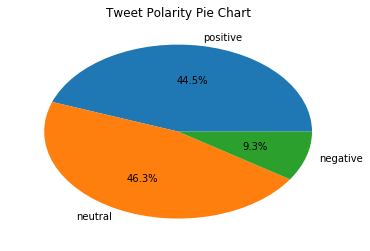

In [227]:
import matplotlib.pyplot as plt
%matplotlib inline

positive_tweets = len(positive_df)
negative_tweets = len(negative_df)
neutral_tweets = len(neutral_df)


a = [positive_tweets,neutral_tweets,negative_tweets]
labels = 'positive','neutral','negative'

plt.pie(a,labels=labels, autopct='%1.1f%%')
plt.title("Tweet Polarity Pie Chart")
plt.savefig('tweetpolarity.png')

### Findings:
We can see that out of the 500 tweets, "positive" and "neutral" tweets are almost equal in number at 44.5% and 46.3% respectively. Only 9.3% of the tweets are "negative" in nature.

## Frequency Coupled Hashtags
Next, what I thought was interesting to find out is what other hashtags are often used according to the types of tweet: Positive, Negative, and Neutral. To do this, we create a function to group all hashtags used for a particular type of tweet, excluding all variants of #boundaries with the help of the 're' module used for regular expressions.

## Top Ten Positive Hashtags

[('eBook', 13), ('CyberMonday', 9), ('amwriting', 6), ('WritersGuide2Persistence', 6), ('HealingAffirmation', 6), ('sexworkers', 6), ('MARRIAGE', 6), ('innovate', 5), ('success', 5), ('Science', 5)]


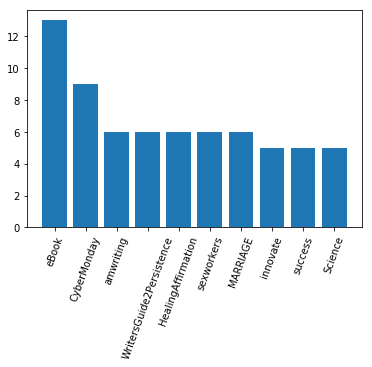

In [310]:
import re


def get_hashtags(df):
    hashtags = []
    for text in df["text"]:
        set  = {word.strip("#") for word in text.split() if word.startswith("#")}
        for s in set:
            if re.search("[Bb][Oo][Uu][Nn][Dd][Aa][Rr][Ii][Ee][Ss]", s) is not None:
                pass
            else:
                hashtags.append(s)
    return hashtags


positive_hashtags = get_hashtags(positive_df)

positive_hashtag_dict = {}

for hashtag in positive_hashtags:
    if hashtag in positive_hashtag_dict:
        positive_hashtag_dict[hashtag] += 1
    else:
        positive_hashtag_dict[hashtag] = 1

top_ten_positive =sorted(positive_hashtag_dict.items(), key=lambda x:x[1],reverse=True)[:10]
print(top_ten_positive)

plt.bar(range(len(top_ten_positive)), [val[1] for val in top_ten_positive], align='center')
plt.xticks(range(len(top_ten_positive)), [val[0] for val in top_ten_positive])
plt.xticks(rotation=790)
plt.savefig('toptenpositive.png')

### Findings:
Many of the top hashtags for positive tweets are sales related e.g. 'eBook' and'CyberMonday' as the API pulls the latest tweets, and we are just finished with Cyber Monday 2017. Interestingly, others are writing related such as 'amwriting'and'WritersGuide2Persistence'. Other general positive hashtags are also seen such as 'innovate' and 'success', while some seem out of place such as 'sexworkers' because of its negative connotation.

## Top Ten Negative Hashtags

[('NO.', 5), ('behavior', 5), ('nomeansno', 5), ('parenting', 5), ('Quote', 5), ('Stinks', 3), ('BrothersCat', 3), ('recovery', 3), ('narcissisticabuse', 3), ('security', 3)]


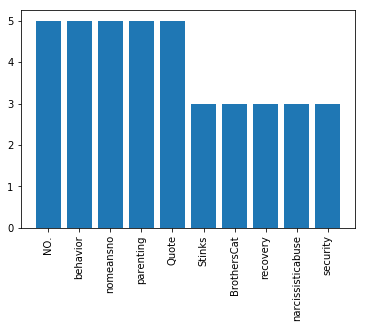

In [311]:
negative_hashtags = get_hashtags(negative_df)            
negative_hashtag_dict = {}

for hashtag in negative_hashtags:
    if hashtag in negative_hashtag_dict:
        negative_hashtag_dict[hashtag] += 1
    else:
        negative_hashtag_dict[hashtag] = 1
        
top_ten_negative =sorted(negative_hashtag_dict.items(), key=lambda x:x[1],reverse=True)[:10]
print(top_ten_negative)

plt.bar(range(len(top_ten_negative)), [val[1] for val in top_ten_negative], align='center')
plt.xticks(range(len(top_ten_negative)), [val[0] for val in top_ten_negative])
plt.xticks(rotation=90)
plt.savefig('toptennegative.png')

### Findings:
I feel that the top ten results for negative hashtags makes more sense. A big fat 'NO' takes the number one spot, followed by 'behavior' and another resistance related hashtag 'nomeansno'.  In general, the accompanying hashtags are negatively skewed, which matched the tweet's negative label.

## Top Ten Neutral Hashtags

[('lifecoach', 25), ('selfesteem', 15), ('NaturalCapital', 8), ('NatCap17', 8), ('selflove', 7), ('Codependents', 7), ('Thehappymedium', 7), ('takenoshit', 7), ('lovemore…', 7), ('heal', 6)]


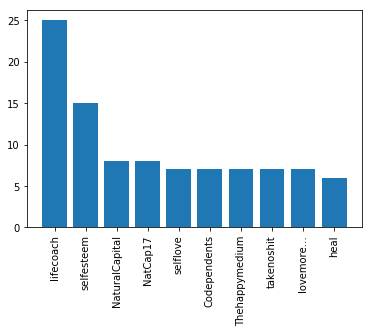

In [312]:
neutral_hashtags = get_hashtags(neutral_df)
neutral_hashtag_dict = {}

for hashtag in neutral_hashtags:
    if hashtag in neutral_hashtag_dict:
        neutral_hashtag_dict[hashtag] += 1
    else:
        neutral_hashtag_dict[hashtag] = 1
        
top_ten_neutral =sorted(neutral_hashtag_dict.items(), key=lambda x:x[1],reverse=True)[:10]
print(top_ten_neutral)

plt.bar(range(len(top_ten_neutral)), [val[1] for val in top_ten_neutral], align='center')
plt.xticks(range(len(top_ten_neutral)), [val[0] for val in top_ten_neutral])
plt.xticks(rotation=90)
plt.savefig('toptenneutral.png')

### Findings:
Interestingly, "neutral" tweets are accompanies by positive hashtags more so than actual "positive" tweets! These positive hashtags include "lifecoach", "selfesteem","selflove", "lovemore" and "heal".